In [1]:
from analysis.analyze_results import *
from pathlib import Path
import matplotlib

In [2]:
# output_base_folder = Path("/iarai/work/logs/storage_benchmarking")
output_base_folder = Path("/home/ivan/temp/temp-benchmarking")


## Dataloader benchmark (num workers, batch size)

**parameters**

| param | range |
| --- | --- |
| num_workers |0, 2, 4, 8, 16 | 
| batch_size | 8, 16, 32, 64 | 
| num_fetch_workers | 4, 8, 16, 32 | 
| fetch_impl | asyncio, threaded |
| dataset | s3,scratch |

Batch pool size is fixed to 10

**parameters explained**

| param | implementation | details | 
| --- | --- | --- |
| batch_pool_size | asyncio | Unused |
|  | threaded | Number of batches to fetch in parallel (normally, one batch is fetched, and items are downloaded (sequentially or in parallel). This implementation takes N batches and starts downloading items in parallel. Individual items are yielded and once a full batch is collected it is yielded.)|
| num_fetch_workers | asyncio | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls. Also, the number of tasks initially placed into the task (worker) queue.  |
|  | threaded | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls |

```bash
 for fetch_impl in "threaded" "asyncio"; do
   for storage in "s3" "scratch"; do
     for batch_size in 8 16 32 64; do
       for num_workers in 0 2 4 8 16; do
         for num_fetch_workers in 4 8 16 32; do
           python3 benchmark/benchmark_dataloader.py --output_base_folder /iarai/home/ivan.svogor/git/storage-benchmarking/src/benchmark_output/dataloader \
           --dataset "${storage}"  \
           --num_fetch_workers "${num_fetch_workers}" \
           --num_workers  "${num_workers}" \
           --repeat 1 \
           --num_batches 50 \
           --batch_size "${batch_size}" \
           --prefetch_factor 2 \
           --fetch_impl "${fetch_impl}"
         done
       done
     done
   done
 done
```

In [3]:
group_by_dataloader = ["dataset",  "num_fetch_workers", "num_workers", "batch_pool"]

In [4]:
df_dataloader = extract_pandas(output_base_folder, folder_filter="latest/dataloader-0510/*benchmark_dataloader*")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2272/2272 [00:23<00:00, 95.38it/s]


In [5]:
df_dataloader_async=df_dataloader[df_dataloader["fetch_impl"]=="asyncio"]
df_dataloader_threaded=df_dataloader[df_dataloader["fetch_impl"]=="threaded"]

In [6]:
print(df_dataloader.groupby(group_by_dataloader).groups.keys())

dict_keys([('s3', 4, 0, 10), ('s3', 4, 2, 10), ('s3', 4, 4, 10), ('s3', 4, 8, 10), ('s3', 4, 16, 10), ('s3', 8, 0, 10), ('s3', 8, 2, 10), ('s3', 8, 4, 10), ('s3', 8, 8, 10), ('s3', 8, 16, 10), ('s3', 16, 0, 10), ('s3', 16, 2, 10), ('s3', 16, 4, 10), ('s3', 16, 8, 10), ('s3', 16, 16, 10), ('s3', 32, 0, 10), ('s3', 32, 2, 10), ('s3', 32, 4, 10), ('s3', 32, 8, 10), ('s3', 32, 16, 10), ('scratch', 4, 0, 10), ('scratch', 4, 2, 10), ('scratch', 4, 4, 10), ('scratch', 4, 8, 10), ('scratch', 4, 16, 10), ('scratch', 8, 0, 10), ('scratch', 8, 2, 10), ('scratch', 8, 4, 10), ('scratch', 8, 8, 10), ('scratch', 8, 16, 10), ('scratch', 16, 0, 10), ('scratch', 16, 2, 10), ('scratch', 16, 4, 10), ('scratch', 16, 8, 10), ('scratch', 16, 16, 10), ('scratch', 32, 0, 10), ('scratch', 32, 2, 10), ('scratch', 32, 4, 10), ('scratch', 32, 8, 10), ('scratch', 32, 16, 10)])


In [7]:
display(get_run_stats(df_dataloader_async, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers batch_pool run                                                                       
s3      4                 0           10         20211005f191244_benchmark_dataloader_s3_8_0_4_sync         5.150368e+07   
                                                 20211005f191926_benchmark_dataloader_s3_16_0_4_...         1.042699e+08   
                                                 20211005f192738_benchmark_dataloader_s3_32_0_4_...         2.167065e+08   
                                                 20211005f194011_benchmark_dataloader_s3_64_0_4_...         4.310077e+08   
                          2           10         20211005f191426_benchmark_dataloader_s3_8_2_4_sync         1.060035e+08   
...                                                                                                                  ...   
scratch 32                8           10         20211005f200248_benchmark_dataloader_scratch_64...         1.049729e+09   
                          16          10         20211005f195819_benchmark_dataloader_scratch_8_...         1.688395e+08   
                                                 20211005f195940_benchmark_dataloader_scratch_16...         3.361688e+08   
                                                 20211005f200113_benchmark_dataloader_scratch_32...         6.663571e+08   
                                                 20211005f200310_benchmark_dataloader_scratch_64...         1.321717e+09   

                                                                                                       time_start  \
dataset num_fetch_workers num_workers batch_pool run                                                                
s3      4                 0           10         20211005f191244_benchmark_dataloader_s3_8_0_4_sync  1.633454e+09   
                                                 20211005f191926_benchmark_dataloader_s3_16_0_4_...  1.633454e+09   
                                                 20211005f192738_benchmark_dataloader_s3_32_0_4_...  1.633455e+09   
                                                 20211005f194011_benchmark_dataloader_s3_64_0_4_...  1.633456e+09   
                          2           10         20211005f191426_benchmark_dataloader_s3_8_2_4_sync  1.633454e+09   
...                                                                                                           ...   
scratch 32                8           10         20211005f200248_benchmark_dataloader_scratch_64...  1.633457e+09   
                          16          10         20211005f195819_benchmark_dataloader_scratch_8_...  1.633457e+09   
                                                 20211005f195940_benchmark_dataloader_scratch_16...  1.633457e+09   
                                                 20211005f200113_benchmark_dataloader_scratch_32...  1.633457e+09   
                                                 20211005f200310_benchmark_dataloader_scratch_64...  1.633457e+09   

                                                                                                         time_end  \
dataset num_fetch_workers num_workers batch_pool run                                                                
s3      4                 0           10         20211005f191244_benchmark_dataloader_s3_8_0_4_sync  1.633454e+09   
                                                 20211005f191926_benchmark_dataloader_s3_16_0_4_...  1.633454e+09   
                                                 20211005f192738_benchmark_dataloader_s3_32_0_4_...  1.633455e+09   
                                                 20211005f194011_benchmark_dataloader_s3_64_0_4_...  1.633456e+09   
                          2           10         20211005f191426_benchmark_dataloader_s3_8_2_4_sync  1.633454e+09   
...                                                                                                           ...   
scratch 32                8   

In [8]:
display(get_run_stats(df_dataloader_threaded, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers batch_pool run                                                                       
s3      4                 0           10         20211005f182157_benchmark_dataloader_s3_8_0_4_sync          103648088.0   
                                                 20211005f182928_benchmark_dataloader_s3_16_0_4_...          226220678.0   
                                                 20211005f183840_benchmark_dataloader_s3_32_0_4_...          455527884.0   
                                                 20211005f185017_benchmark_dataloader_s3_64_0_4_...          826744760.0   
                          2           10         20211005f182401_benchmark_dataloader_s3_8_2_4_sync          106057076.0   
...                                                                                                                  ...   
scratch 32                8           10         20211005f191213_benchmark_dataloader_scratch_64...          662141884.0   
                          16          10         20211005f190703_benchmark_dataloader_scratch_8_...           40340808.0   
                                                 20211005f190838_benchmark_dataloader_scratch_16...           56571412.0   
                                                 20211005f191018_benchmark_dataloader_scratch_32...          185285792.0   
                                                 20211005f191239_benchmark_dataloader_scratch_64...          706787498.0   

                                                                                                       time_start  \
dataset num_fetch_workers num_workers batch_pool run                                                                
s3      4                 0           10         20211005f182157_benchmark_dataloader_s3_8_0_4_sync  1.633451e+09   
                                                 20211005f182928_benchmark_dataloader_s3_16_0_4_...  1.633451e+09   
                                                 20211005f183840_benchmark_dataloader_s3_32_0_4_...  1.633452e+09   
                                                 20211005f185017_benchmark_dataloader_s3_64_0_4_...  1.633453e+09   
                          2           10         20211005f182401_benchmark_dataloader_s3_8_2_4_sync  1.633451e+09   
...                                                                                                           ...   
scratch 32                8           10         20211005f191213_benchmark_dataloader_scratch_64...  1.633454e+09   
                          16          10         20211005f190703_benchmark_dataloader_scratch_8_...  1.633454e+09   
                                                 20211005f190838_benchmark_dataloader_scratch_16...  1.633454e+09   
                                                 20211005f191018_benchmark_dataloader_scratch_32...  1.633454e+09   
                                                 20211005f191239_benchmark_dataloader_scratch_64...  1.633454e+09   

                                                                                                         time_end  \
dataset num_fetch_workers num_workers batch_pool run                                                                
s3      4                 0           10         20211005f182157_benchmark_dataloader_s3_8_0_4_sync  1.633451e+09   
                                                 20211005f182928_benchmark_dataloader_s3_16_0_4_...  1.633451e+09   
                                                 20211005f183840_benchmark_dataloader_s3_32_0_4_...  1.633452e+09   
                                                 20211005f185017_benchmark_dataloader_s3_64_0_4_...  1.633453e+09   
                          2           10         20211005f182401_benchmark_dataloader_s3_8_2_4_sync  1.633451e+09   
...                                                                                                           ...   
scratch 32                8   

In [9]:
display(get_thread_stats(df_dataloader_async,group_by=group_by_dataloader))

time_start_thread  time_end_thread  total_elapsed_thread  \
threading_ident                                                             
139621505615616       1.633455e+09     1.633455e+09            733.899763   
139621514008320       1.633455e+09     1.633455e+09            735.429172   
139622141695744       1.633455e+09     1.633455e+09            735.491664   
139622150088448       1.633455e+09     1.633455e+09            734.069020   
139622821259008       1.633455e+09     1.633455e+09            735.364492   
...                            ...              ...                   ...   
140709308172032       1.633454e+09     1.633454e+09             13.398205   
140709484336896       1.633454e+09     1.633454e+09             13.562341   
140709492729600       1.633454e+09     1.633454e+09             13.067937   
140709501122304       1.633454e+09     1.633454e+09             13.349423   
140709509515008       1.633454e+09     1.633454e+09             13.220789   

                dataset  num_fetch_workers  num_workers  batch_pool  \
threading_ident                                                       
139621505615616      s3                  8           16          10   
139621514008320      s3                  8           16          10   
139622141695744      s3                  8           16          10   
139622150088448      s3                  8           16          10   
139622821259008      s3                  8           16          10   
...                 ...                ...          ...         ...   
140709308172032      s3                  8            0          10   
140709484336896      s3                  8            0          10   
140709492729600      s3                  8            0          10   
140709501122304      s3                  8            0          10   
140709509515008      s3                  8            0          10   

                 elapsed_thread  elapsed_processing  
threading_ident                                      
139621505615616       26.307853           27.896604  
139621514008320       26.363312           27.895933  
139622141695744       26.383211           27.877261  
139622150088448       26.354612           27.853532  
139622821259008       26.357807           27.899305  
...                         ...                 ...  
140709308172032       16.955323            0.790206  
140709484336896       16.951670            0.800059  
140709492729600       16.945636            0.771168  
140709501122304       16.967249            0.786776  
140709509515008       16.936957            0.780588  

[1958 rows x 9 columns]

In [10]:
display(get_thread_stats(df_dataloader_threaded,group_by=group_by_dataloader))

time_start_thread  time_end_thread  total_elapsed_thread  \
threading_ident                                                             
139621145941760       1.633453e+09     1.633453e+09             79.748865   
139621154334464       1.633453e+09     1.633453e+09             71.089784   
139621950056192       1.633453e+09     1.633453e+09             98.889806   
139621958448896       1.633453e+09     1.633453e+09            103.520809   
139621975234304       1.633453e+09     1.633453e+09             17.798006   
...                            ...              ...                   ...   
140696884381440       1.633454e+09     1.633454e+09              4.737254   
140696926328576       1.633454e+09     1.633454e+09              1.880601   
140696968275712       1.633454e+09     1.633454e+09              1.649238   
140697010222848       1.633454e+09     1.633454e+09              1.864973   
140697052169984       1.633454e+09     1.633454e+09              3.372433   

                 dataset  num_fetch_workers  num_workers  batch_pool  \
threading_ident                                                        
139621145941760       s3                  4            4          10   
139621154334464       s3                  4            4          10   
139621950056192       s3                  4            4          10   
139621958448896       s3                  4            4          10   
139621975234304       s3                  4            4          10   
...                  ...                ...          ...         ...   
140696884381440  scratch                  8            2          10   
140696926328576  scratch                  8            2          10   
140696968275712  scratch                  8            2          10   
140697010222848  scratch                  8            2          10   
140697052169984  scratch                  8            2          10   

                 elapsed_thread  elapsed_processing  
threading_ident                                      
139621145941760       12.707285            6.275838  
139621154334464       10.287556            6.910269  
139621950056192       19.821989            4.988894  
139621958448896       19.830141            5.220377  
139621975234304        9.184710            1.937786  
...                         ...                 ...  
140696884381440        3.155832            1.501111  
140696926328576        1.085407            1.732623  
140696968275712        0.805763            2.046801  
140697010222848        1.082226            1.723276  
140697052169984        2.271139            1.484908  

[6703 rows x 9 columns]

### S3 Event plots of dataloading

#### Async

In [11]:
df_dataloader_s3_async=df_dataloader_async[df_dataloader_async["dataset"]=="s3"]
df_dataloader_s3_threaded=df_dataloader_threaded[df_dataloader_threaded["dataset"]=="s3"]

In [12]:
print(np.unique(df_dataloader_s3_async["num_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_async["num_fetch_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_async["batch_size"].to_numpy()))

[ 0  2  4  8 16]
[ 4  8 16 32]
[ 8 16 32 64]


In [13]:
def print_rate_table(df):
    rate_matrix = pd.DataFrame(columns=["batch_size", "num_fetch_workers", "num_workers", "rate"])
    for i, batch_size in enumerate(np.unique(df["batch_size"].to_numpy())):
        for j, num_fetch_workers in enumerate(np.unique(df["num_fetch_workers"].to_numpy())):
            for k, num_workers in enumerate(np.unique(df["num_workers"].to_numpy())):
                run = df[(df["num_fetch_workers"]==num_fetch_workers) & 
                         (df["num_workers"]==num_workers) &
                         (df["batch_size"]==batch_size)]["run"].iloc[0]
                mbps, mbitps = plot_events_timeline(df[df["run"]==run], 
                                                    summary_only=True, 
                                                    verbose=False)
                if "GB" in list(mbitps)[0]:
                    r = float(list(mbitps)[0].replace("GB", "")) * 1000
                else:
                    r = float(list(mbitps)[0].replace("MB", ""))
                rate_matrix = rate_matrix.append({'batch_size': batch_size, 
                                                  'num_fetch_workers': num_fetch_workers, 
                                                  'num_workers': num_workers,
                                                  'rate': r}, ignore_index=True)    
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(rate_matrix.sort_values(["rate"], ascending=False))
    return rate_matrix

In [14]:
s3_rate_matrix_asyncio = print_rate_table(df_dataloader_s3_async)

    batch_size  num_fetch_workers  num_workers   rate
64        64.0                4.0         16.0  370.1
68        64.0                8.0          8.0  362.1
69        64.0                8.0         16.0  321.7
72        64.0               16.0          4.0  309.2
73        64.0               16.0          8.0  305.7
63        64.0                4.0          8.0  292.9
67        64.0                8.0          4.0  277.4
44        32.0                4.0         16.0  268.7
43        32.0                4.0          8.0  237.7
71        64.0               16.0          2.0  231.5
48        32.0                8.0          8.0  229.3
74        64.0               16.0         16.0  228.6
77        64.0               32.0          4.0  220.9
52        32.0               16.0          4.0  211.6
76        64.0               32.0          2.0  207.4
49        32.0                8.0         16.0  203.1
78        64.0               32.0          8.0  175.9
62        64.0              

#### Threaded

In [15]:
print(np.unique(df_dataloader_s3_threaded["num_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_threaded["num_fetch_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_threaded["batch_size"].to_numpy()))

[ 0  2  4  8 16]
[ 4  8 16 32]
[ 8 16 32 64]


In [16]:
s3_rate_matrix_threaded = print_rate_table(df_dataloader_s3_threaded)

    batch_size  num_fetch_workers  num_workers   rate
64        64.0                4.0         16.0  395.3
68        64.0                8.0          8.0  373.9
72        64.0               16.0          4.0  321.8
63        64.0                4.0          8.0  312.3
73        64.0               16.0          8.0  295.2
67        64.0                8.0          4.0  291.3
43        32.0                4.0          8.0  266.6
48        32.0                8.0          8.0  254.8
44        32.0                4.0         16.0  246.9
71        64.0               16.0          2.0  225.1
69        64.0                8.0         16.0  217.7
77        64.0               32.0          4.0  215.7
47        32.0                8.0          4.0  215.0
52        32.0               16.0          4.0  214.3
49        32.0                8.0         16.0  201.2
76        64.0               32.0          2.0  198.0
62        64.0                4.0          4.0  194.4
23        16.0              

### Comparison - asyncio vs. threaded

*Bubble plot* 
 - x-axis, batch_pool_size 
 - y-axis, num_fetch_workers
 - dot-size, rate in mbit/s

Text(0.5, 1.0, 'Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)')

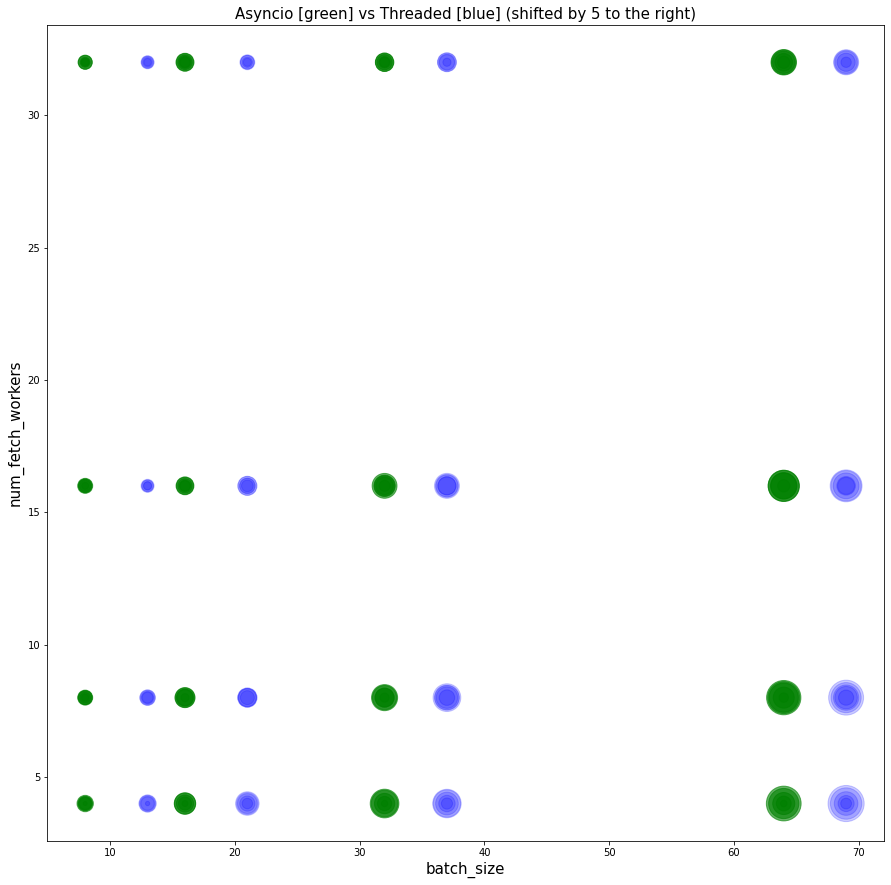

In [17]:
plt.rcParams["figure.figsize"] = (15,15)
ax = plt.gca()
ax.scatter(s3_rate_matrix_asyncio.batch_size, 
           s3_rate_matrix_asyncio.num_fetch_workers,
           s=s3_rate_matrix_asyncio.rate**1.2,
             alpha=0.6, 
             c="green",
             marker='o')
ax.scatter(s3_rate_matrix_threaded.batch_size+5, 
           s3_rate_matrix_threaded.num_fetch_workers, 
           s=s3_rate_matrix_threaded.rate**1.2,
             alpha=0.2, 
             c="blue",
             marker='o')
plt.xlabel("batch_size", size=15)
plt.ylabel("num_fetch_workers", size=15)
plt.title("Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)", size=15)

Text(0.5, 1.0, 'Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)')

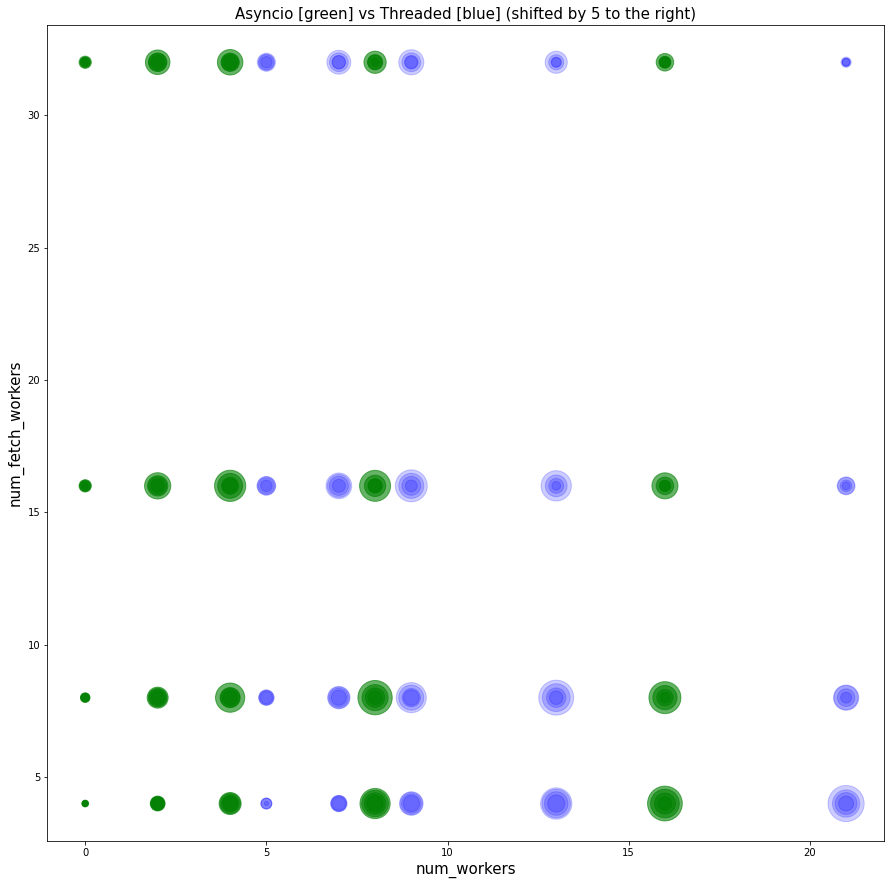

In [18]:
plt.rcParams["figure.figsize"] = (15,15)
ax = plt.gca()
ax.scatter(s3_rate_matrix_asyncio.num_workers, 
           s3_rate_matrix_asyncio.num_fetch_workers,
           s=s3_rate_matrix_asyncio.rate**1.2,
             alpha=0.6, 
             c="green",
             marker='o')
ax.scatter(s3_rate_matrix_threaded.num_workers+5, 
           s3_rate_matrix_threaded.num_fetch_workers, 
           s=s3_rate_matrix_threaded.rate**1.2,
             alpha=0.2, 
             c="blue",
             marker='o')
plt.xlabel("num_workers", size=15)
plt.ylabel("num_fetch_workers", size=15)
plt.title("Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)", size=15)

Text(0.5, 1.0, 'Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)')

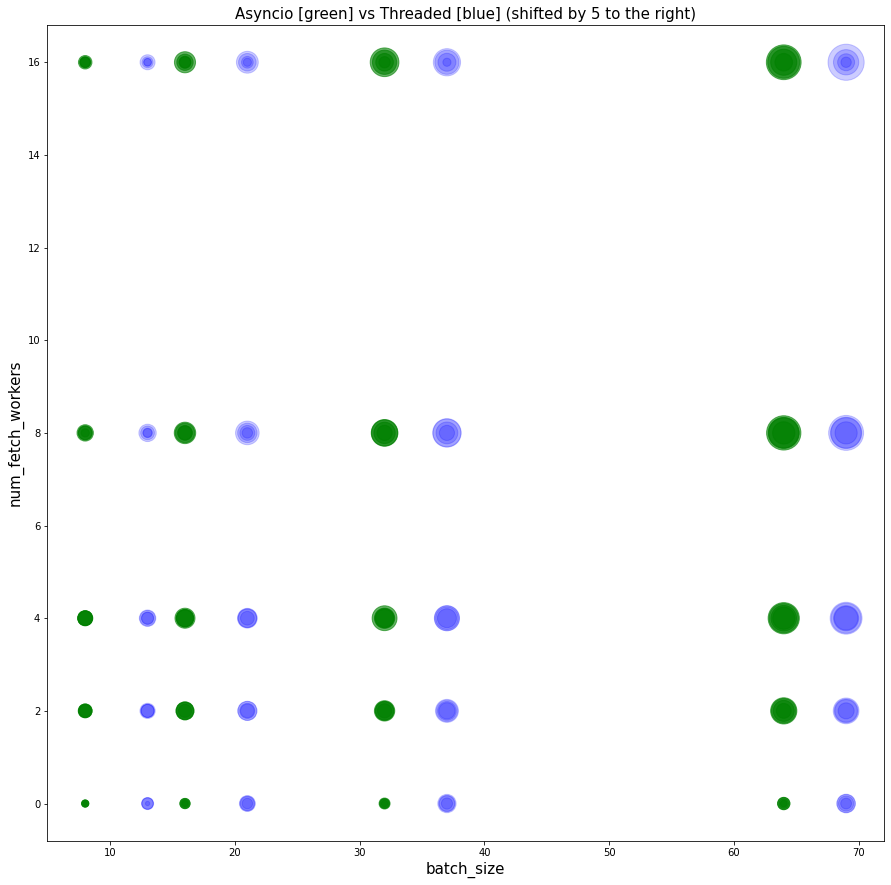

In [19]:
plt.rcParams["figure.figsize"] = (15,15)
ax = plt.gca()
ax.scatter(s3_rate_matrix_asyncio.batch_size, 
           s3_rate_matrix_asyncio.num_workers,
           s=s3_rate_matrix_asyncio.rate**1.2,
             alpha=0.6, 
             c="green",
             marker='o')
ax.scatter(s3_rate_matrix_threaded.batch_size+5, 
           s3_rate_matrix_threaded.num_workers, 
           s=s3_rate_matrix_threaded.rate**1.2,
             alpha=0.2, 
             c="blue",
             marker='o')
plt.xlabel("batch_size", size=15)
plt.ylabel("num_fetch_workers", size=15)
plt.title("Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)", size=15)

In [20]:
s3_both = pd.concat([s3_rate_matrix_asyncio, 
                     s3_rate_matrix_threaded["rate"]], 
                     ignore_index = True, axis = 1)
s3_both['diff'] = s3_both.apply(lambda row: float(row[4] - row[3]) , axis = 1)
s3_both.columns = ['batch_size', 'num_fetch_workers', 'num_workers', 'a_rate', 't_rate', 'diff']
# both["diff"] = both["diff"].clip(lower=0)
# # both

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s3_both.sort_values(["diff"], ascending=False))
    

    batch_size  num_fetch_workers  num_workers  a_rate  t_rate   diff
47        32.0                8.0          4.0   136.6   215.0   78.4
50        32.0               16.0          0.0    54.8   127.8   73.0
70        64.0               16.0          0.0    65.6   131.3   65.7
55        32.0               32.0          0.0    45.3   107.1   61.8
75        64.0               32.0          0.0    65.2   125.6   60.4
45        32.0                8.0          0.0    40.0    96.7   56.7
30        16.0               16.0          0.0    48.3   100.5   52.2
65        64.0                8.0          0.0    42.7    93.2   50.5
25        16.0                8.0          0.0    32.5    81.1   48.6
35        16.0               32.0          0.0    48.1    91.0   42.9
5          8.0                8.0          0.0    26.9    64.0   37.1
51        32.0               16.0          2.0   151.7   186.4   34.7
40        32.0                4.0          0.0    22.1    56.1   34.0
10         8.0      

Bubble plot shows 3 dimensions, however it's hard to visualize the difference between two approaches, therefore the following bar-plots show each dimension batch_pool_size and num_fetch_workers separately, while the y-axis shows the rate in Mbit/s.

Since it doesn't have any effect for asyncio, those should be roughly the same. However, we can observe that for threaded implementation we have the similar result (Does this mean we don't have a problem with batch-collection order? (e.g. batch 3 is not collected before batch 2))

In [21]:
num_workers_unique = np.unique(s3_both["num_workers"].to_numpy())
batch_size_unique = np.unique(s3_both["batch_size"].to_numpy())
num_fetch_workers_unique = np.unique(s3_both["num_fetch_workers"].to_numpy())
print(batch_size_unique)

[ 8. 16. 32. 64.]


In [22]:
import plotly
import plotly.graph_objects as go

#Make Plot.ly Layout
plotly_layout = go.Layout(scene=dict(xaxis=dict(title="batch_size"),
                                     yaxis=dict(title="num_fetch_workers"),
                                     zaxis=dict(title="num_workers")),)

threaded_rate_sizes = s3_both['t_rate']/10

threaded_fig = go.Scatter3d(x=s3_both['batch_size'],
                            y=s3_both['num_fetch_workers'],
                            z=s3_both['num_workers'],
                            marker=dict(size=threaded_rate_sizes,
                                        color="blue",
                                        opacity=0.4,
                                        reversescale=True),
                            line=dict (width=0.02),
                            mode='markers',
                            name="threaded")

fig = go.Figure(data=[threaded_fig], layout=plotly_layout)
fig.show()

In [23]:
async_rate_sizes = s3_both['a_rate']/10

async_fig = go.Scatter3d(x=s3_both['batch_size'],
                            y=s3_both['num_fetch_workers'],
                            z=s3_both['num_workers'],
                            marker=dict(size=async_rate_sizes,
                                        color="green",
                                        opacity=0.4,
                                        reversescale=True),
                            line=dict (width=0.02),
                            mode='markers',
                            name="async")

fig = go.Figure(data=[async_fig], layout=plotly_layout)
fig.show()

In [24]:

async_rate_sizes = s3_both['a_rate']/10
threaded_rate_sizes = s3_both['t_rate']/10


#Make Plotly figure
async_fig = go.Scatter3d(x=s3_both['batch_size'],
                         y=s3_both['num_fetch_workers'],
                         z=s3_both['num_workers'],
                         marker=dict(size=async_rate_sizes,
                                     color="red",
                                     opacity=0.4,
                                     reversescale=True),
                         line=dict (width=0.02),
                         mode='markers',
                         name="asyncio")

threaded_fig = go.Scatter3d(x=s3_both['batch_size'],
                            y=s3_both['num_fetch_workers'],
                            z=s3_both['num_workers'],
                            marker=dict(size=threaded_rate_sizes,
                                        color="blue",
                                        opacity=0.4,
                                        reversescale=True),
                            line=dict (width=0.02),
                            mode='markers',
                            name="threaded")


fig = go.Figure(data=[async_fig, threaded_fig], layout=plotly_layout)
fig.show()

### Threaded best run 

In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s3_both.sort_values(["t_rate"], ascending=False).head())

    batch_size  num_fetch_workers  num_workers  a_rate  t_rate  diff
64        64.0                4.0         16.0   370.1   395.3  25.2
68        64.0                8.0          8.0   362.1   373.9  11.8
72        64.0               16.0          4.0   309.2   321.8  12.6
63        64.0                4.0          8.0   292.9   312.3  19.4
73        64.0               16.0          8.0   305.7   295.2 -10.5


8704
Lines num: 8727


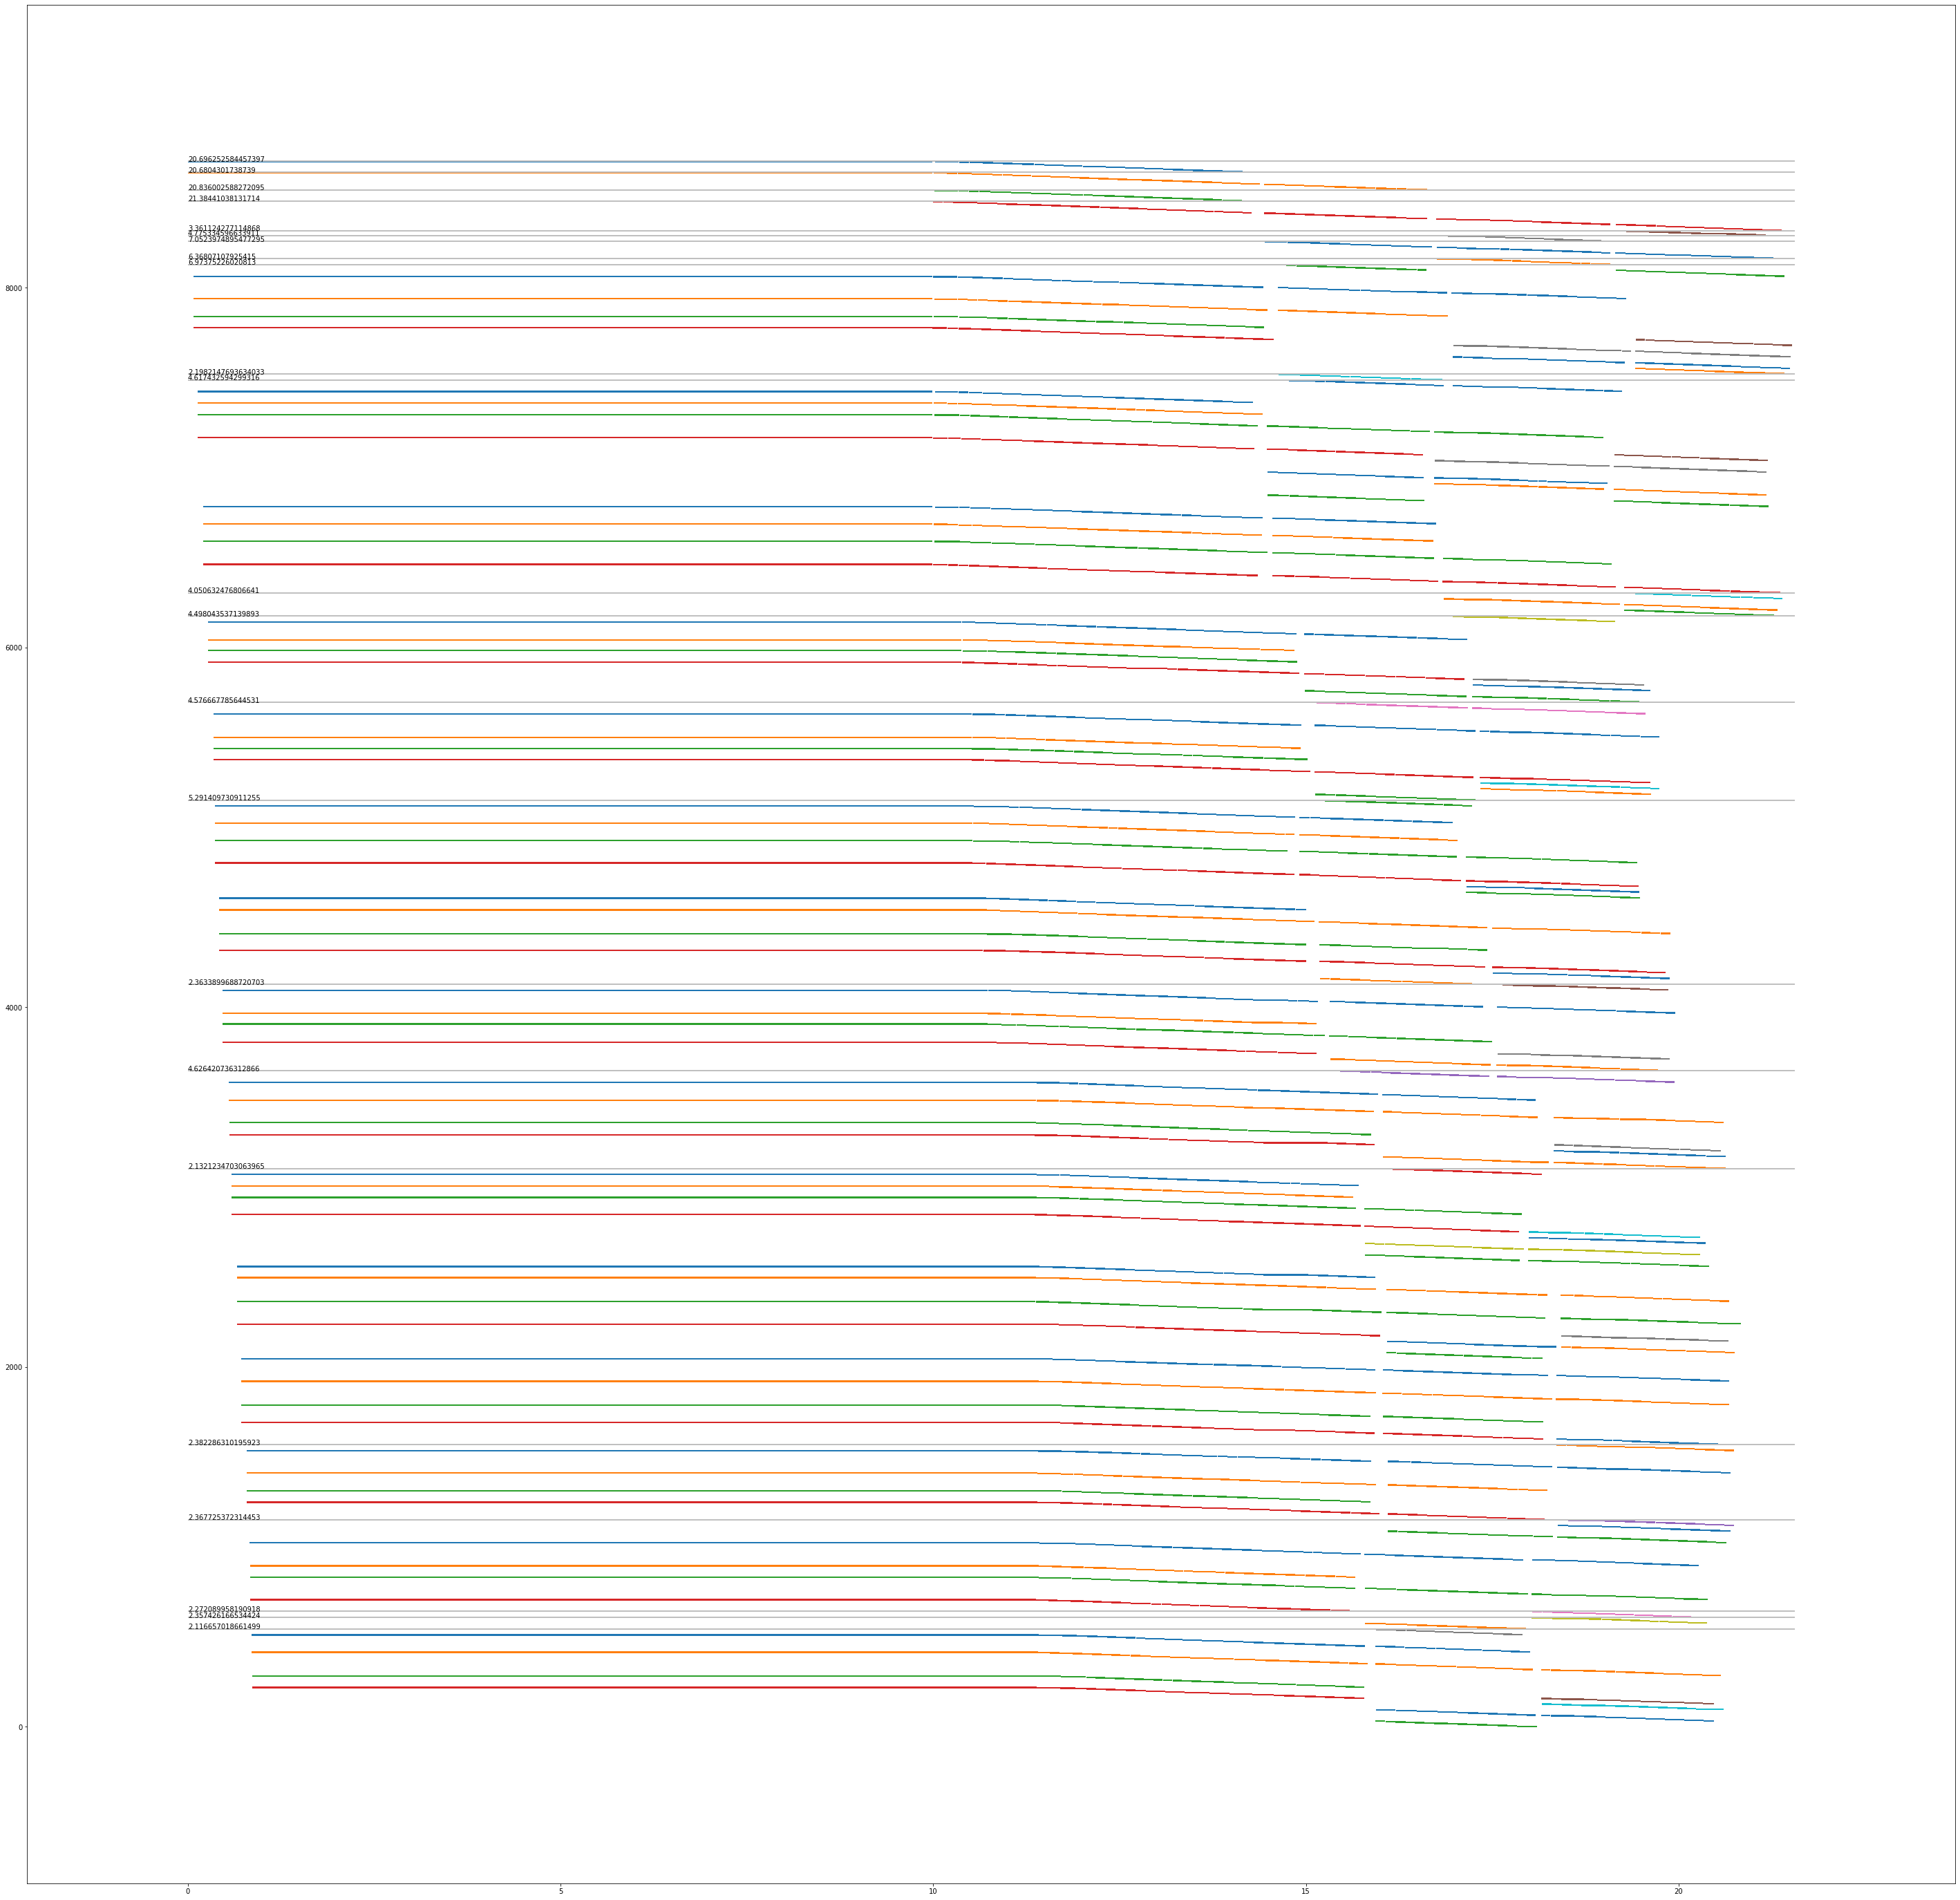

In [26]:
run = df_dataloader_s3_threaded[(df_dataloader_s3_threaded["batch_size"]==64) & 
                                (df_dataloader_s3_threaded["num_fetch_workers"]==4) &
                                (df_dataloader_s3_threaded["num_workers"]==16)]["run"].iloc[0]
plot_events_timeline_detailed(df_dataloader_s3_threaded[df_dataloader_s3_threaded["run"]==run], filter_function="__getitem__")

### Threaded worst run 

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s3_both.sort_values(["t_rate"], ascending=True).head())

    batch_size  num_fetch_workers  num_workers  a_rate  t_rate  diff
0          8.0                4.0          0.0    10.2    11.4   1.2
19         8.0               32.0         16.0    45.4    29.2 -16.2
14         8.0               16.0         16.0    53.9    31.0 -22.9
59        32.0               32.0         16.0    56.3    32.8 -23.5
39        16.0               32.0         16.0    62.3    33.0 -29.3


816
Lines num: 828


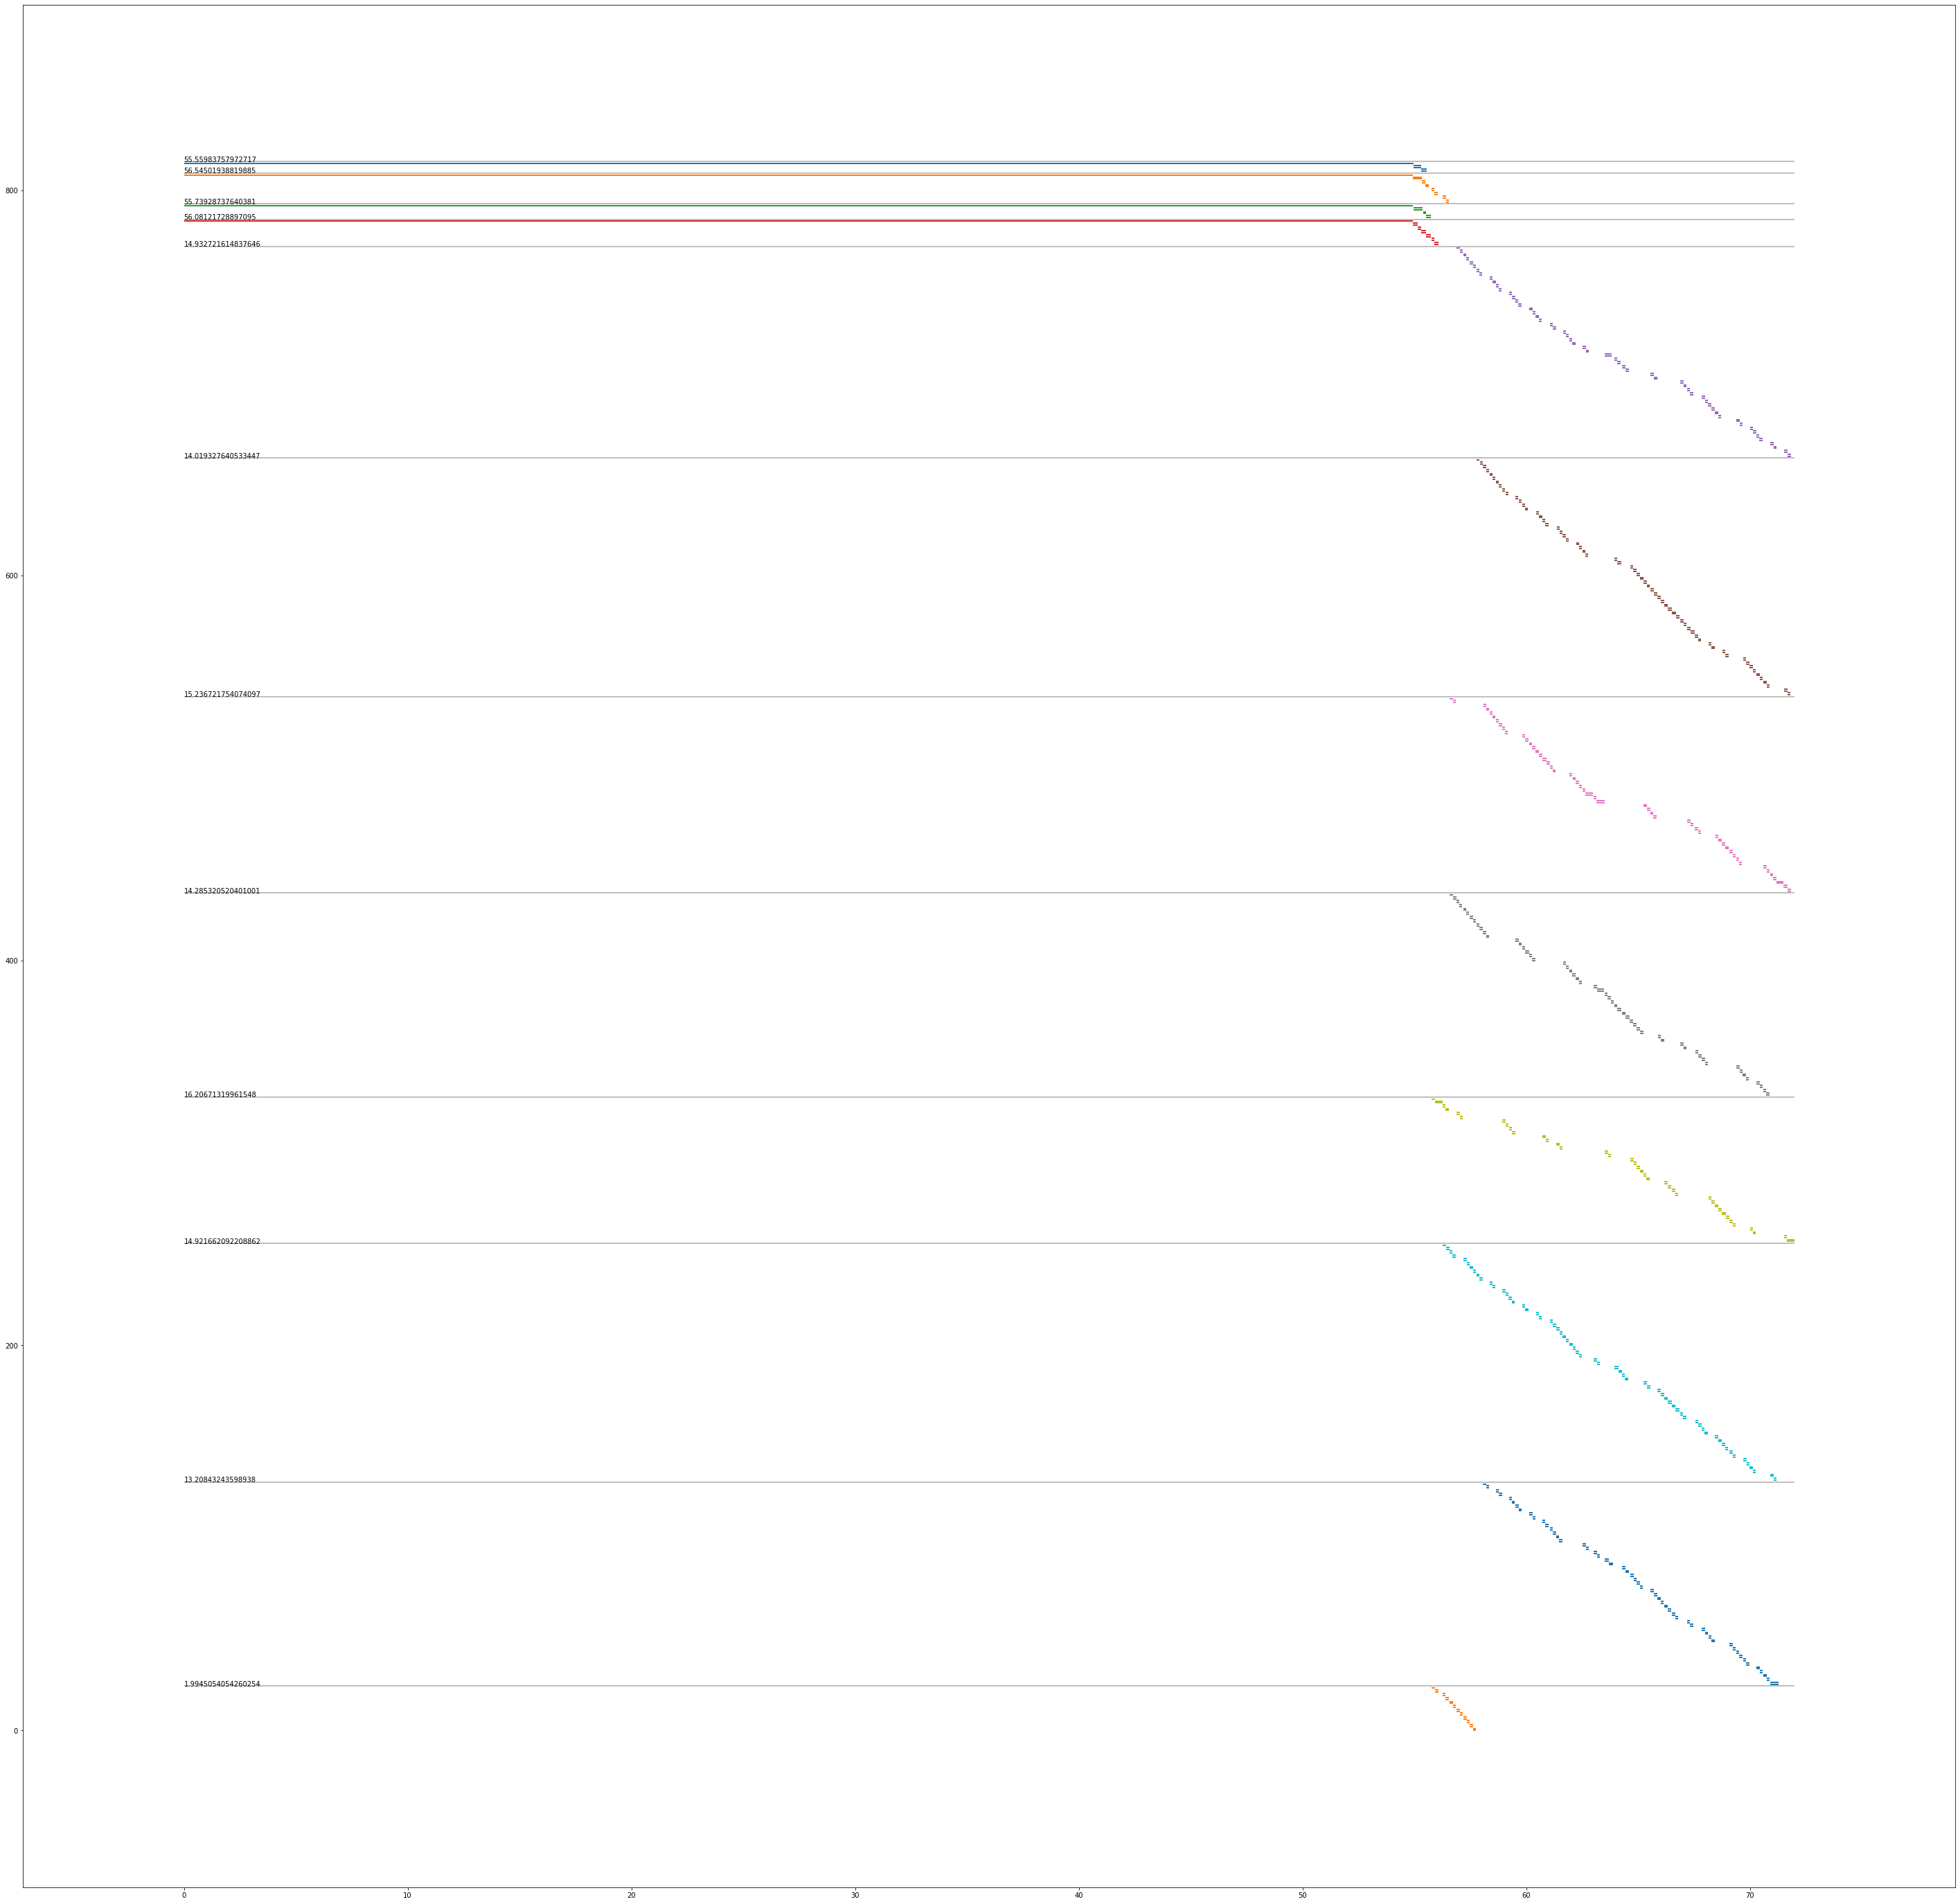

In [28]:
run = df_dataloader_s3_threaded[(df_dataloader_s3_threaded["batch_size"]==8) & 
                                (df_dataloader_s3_threaded["num_fetch_workers"]==4) &
                                (df_dataloader_s3_threaded["num_workers"]==0)]["run"].iloc[0]
plot_events_timeline_detailed(df_dataloader_s3_threaded[df_dataloader_s3_threaded["run"]==run], filter_function="__getitem__")

### Asyncio best run 

In [29]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s3_both.sort_values(["a_rate"], ascending=False).head())

    batch_size  num_fetch_workers  num_workers  a_rate  t_rate   diff
64        64.0                4.0         16.0   370.1   395.3   25.2
68        64.0                8.0          8.0   362.1   373.9   11.8
69        64.0                8.0         16.0   321.7   217.7 -104.0
72        64.0               16.0          4.0   309.2   321.8   12.6
73        64.0               16.0          8.0   305.7   295.2  -10.5


8704
Lines num: 8727


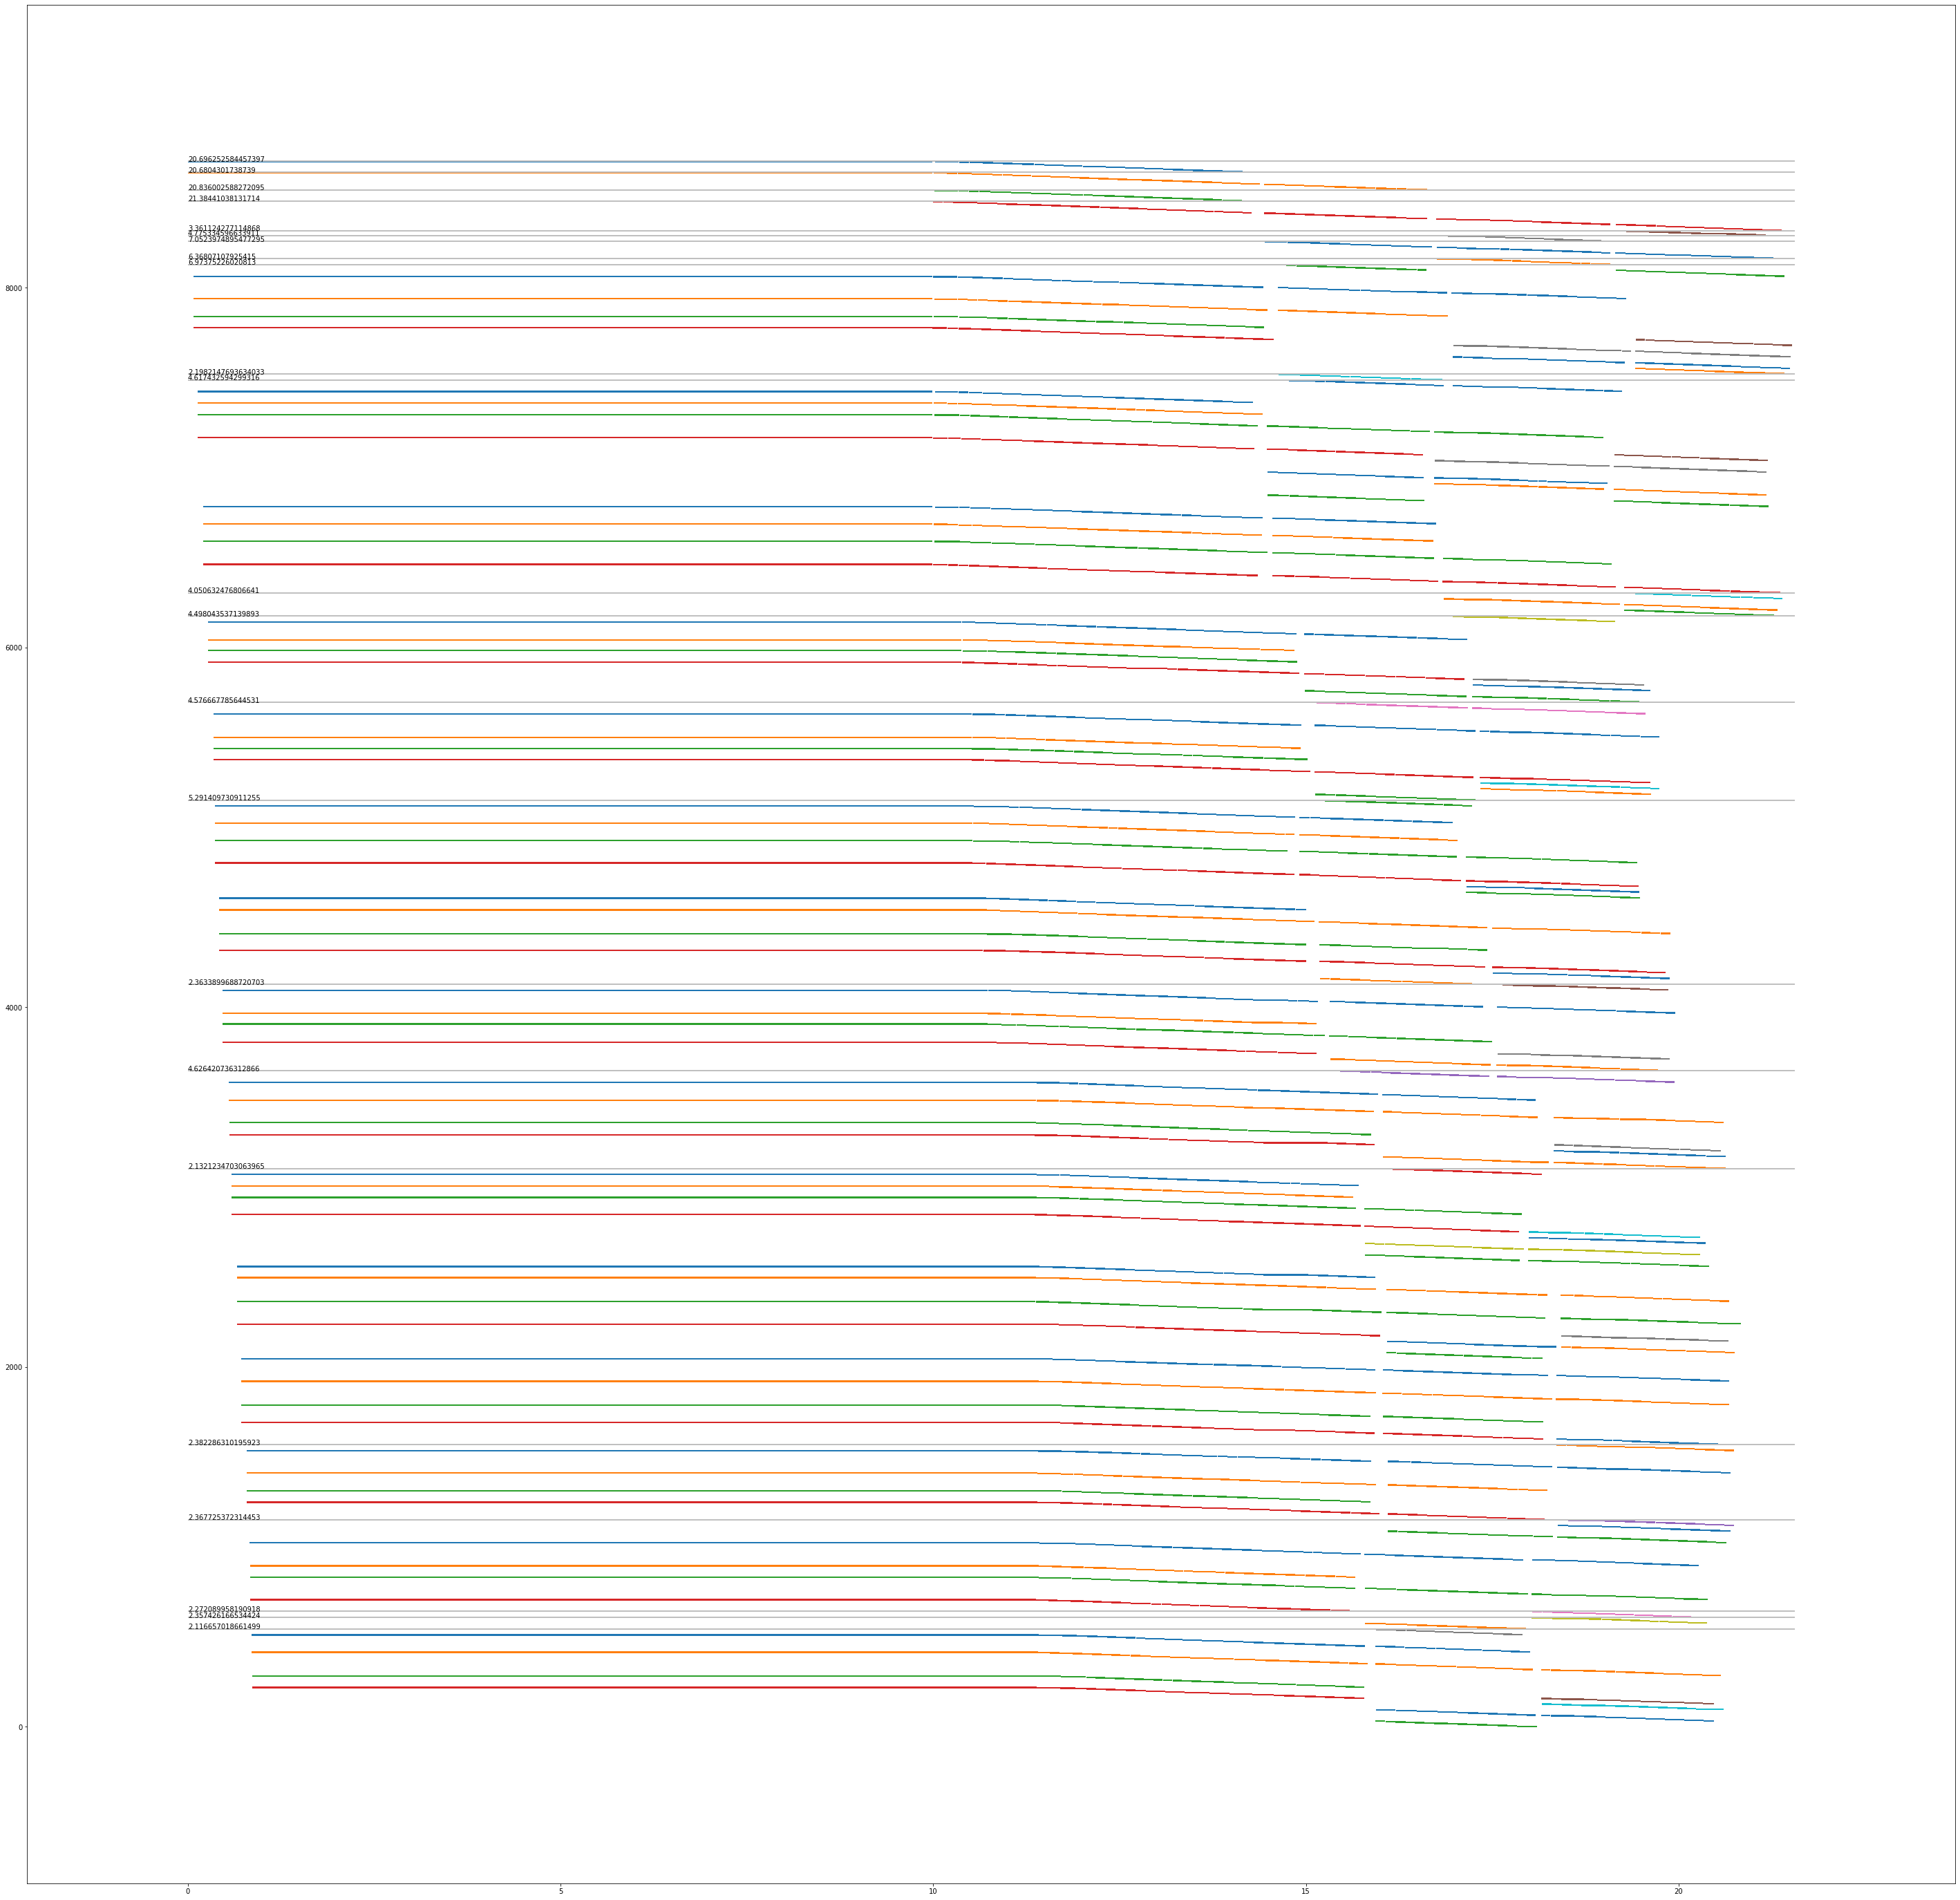

In [30]:
run = df_dataloader_s3_threaded[(df_dataloader_s3_threaded["batch_size"]==64) & 
                                (df_dataloader_s3_threaded["num_fetch_workers"]==4) &
                                (df_dataloader_s3_threaded["num_workers"]==16)]["run"].iloc[0]
plot_events_timeline_detailed(df_dataloader_s3_threaded[df_dataloader_s3_threaded["run"]==run], filter_function="__getitem__")

### Asyncio worst run

In [31]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(s3_both.sort_values(["a_rate"], ascending=True).head())

    batch_size  num_fetch_workers  num_workers  a_rate  t_rate  diff
0          8.0                4.0          0.0    10.2    11.4   1.2
20        16.0                4.0          0.0    19.5    50.6  31.1
40        32.0                4.0          0.0    22.1    56.1  34.0
60        64.0                4.0          0.0    23.4    52.8  29.4
10         8.0               16.0          0.0    25.2    58.8  33.6


816
Lines num: 828


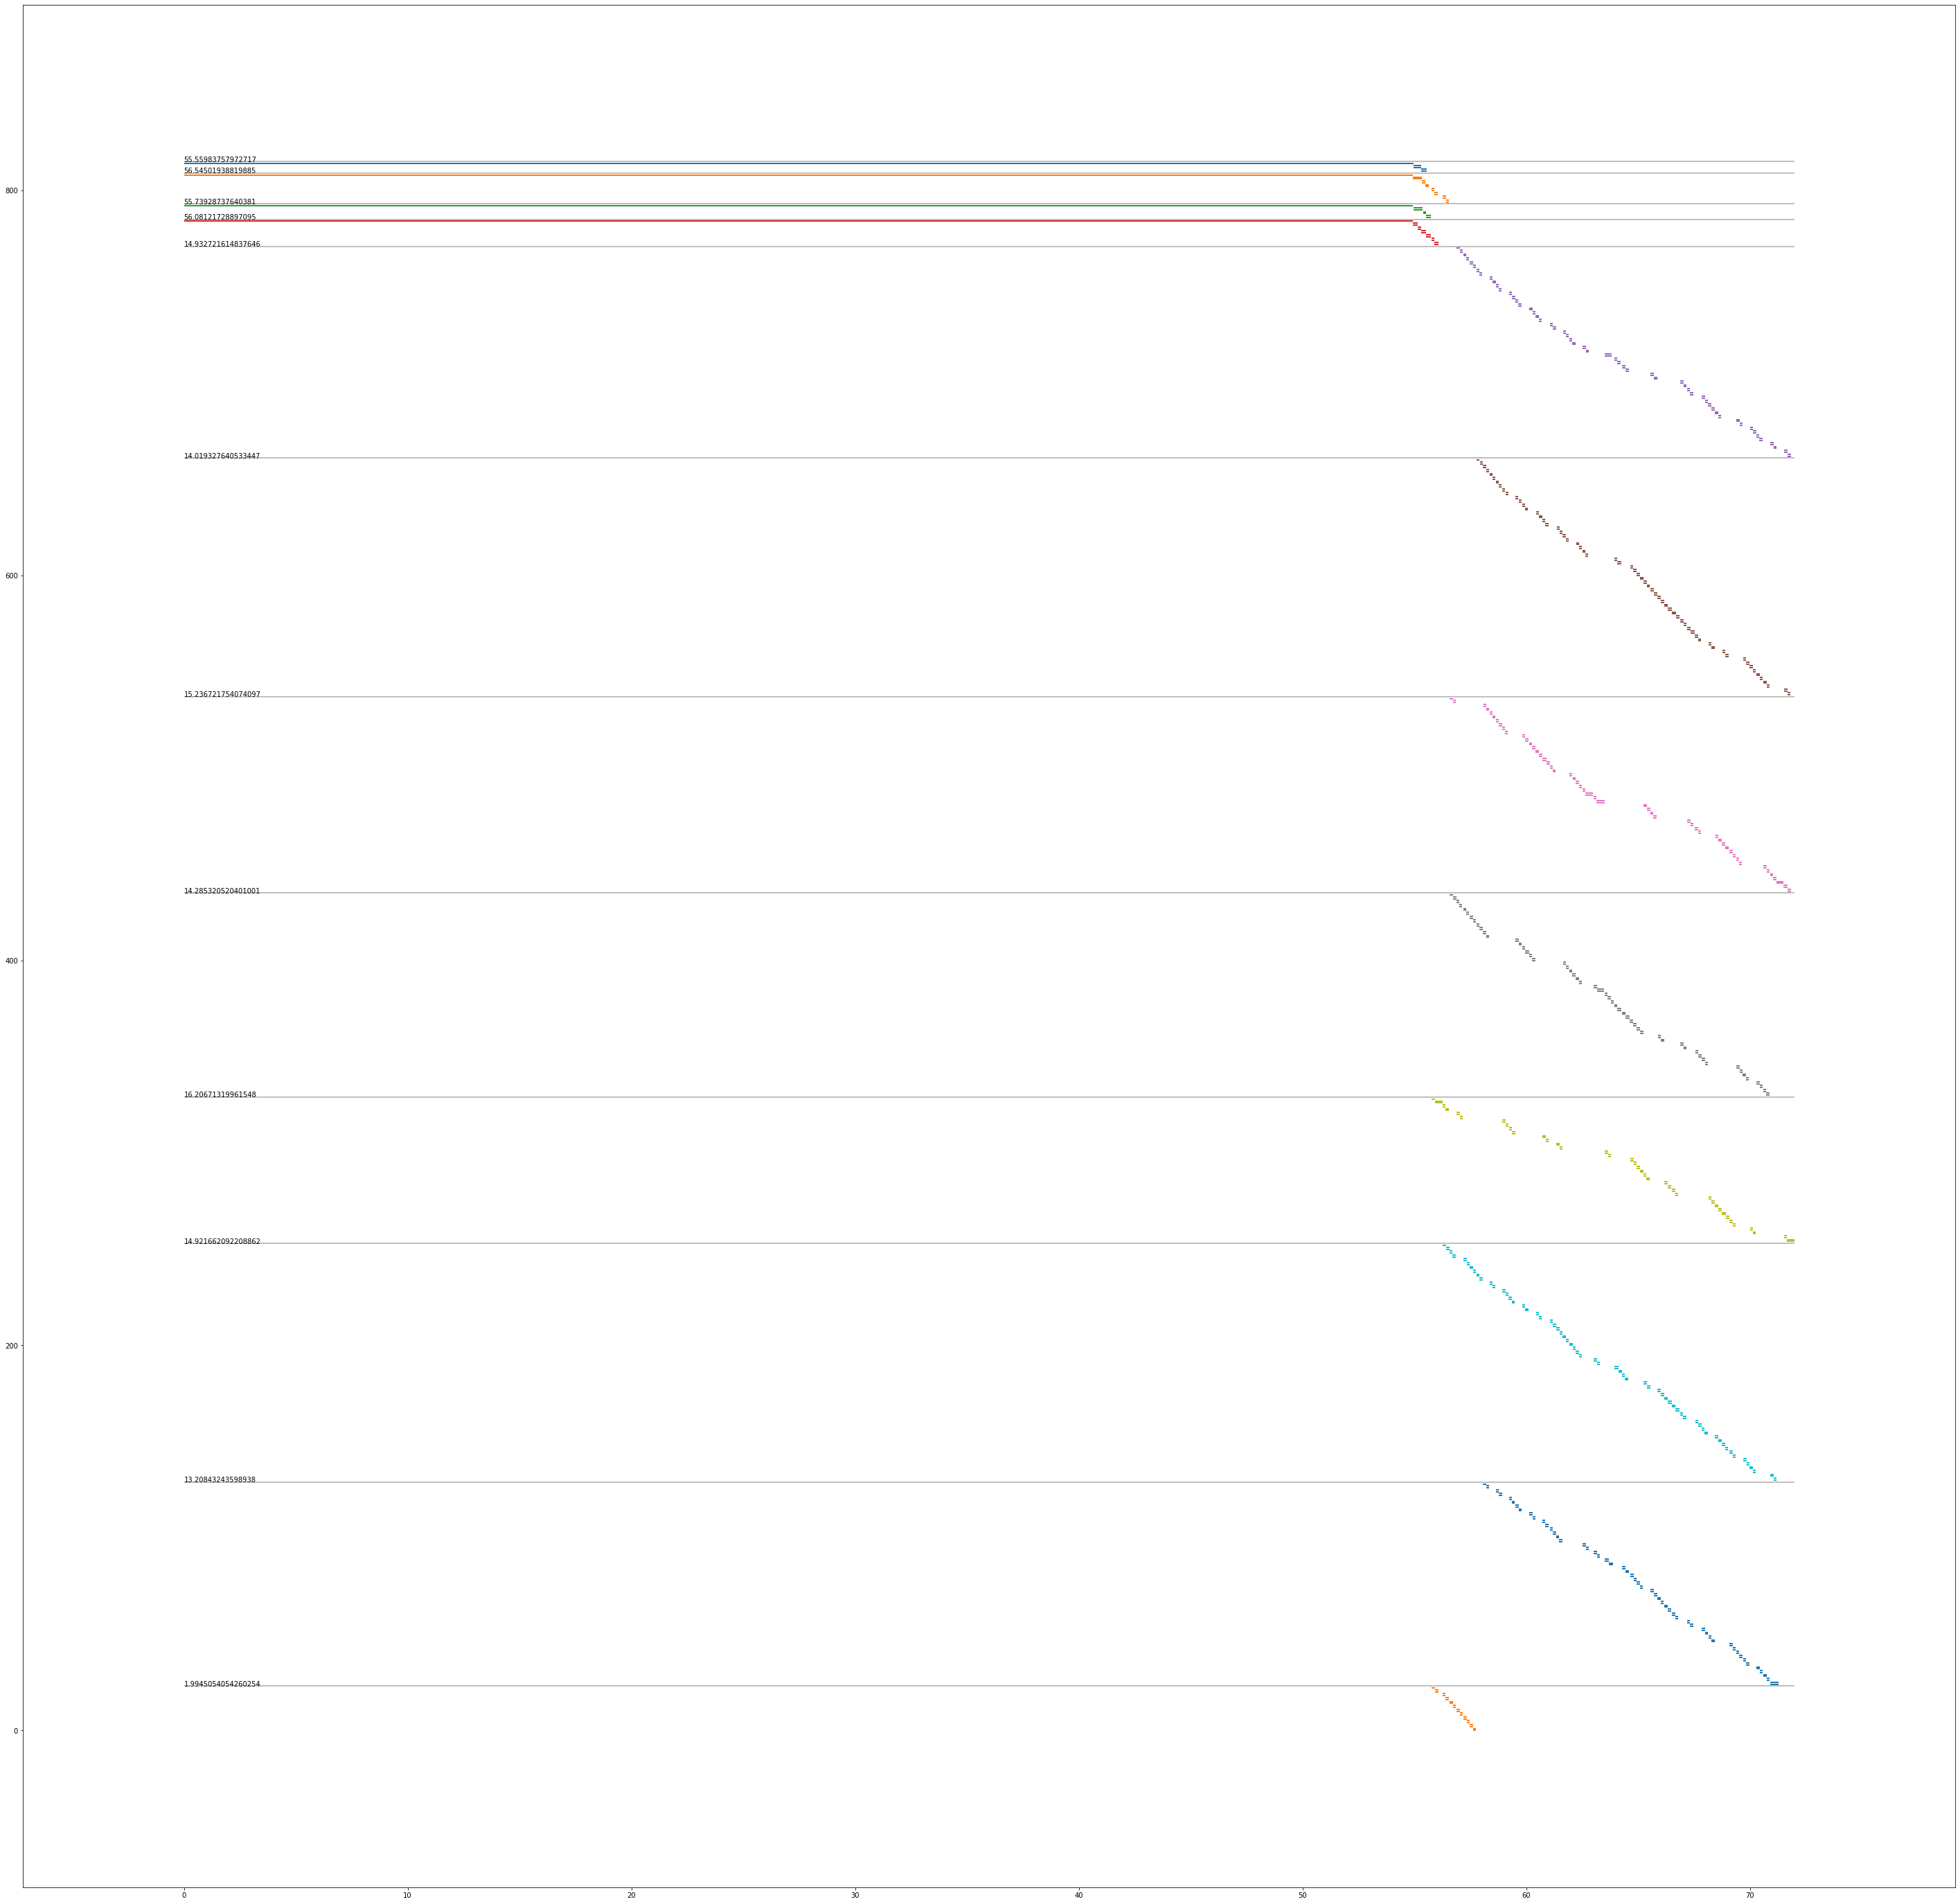

In [32]:
run = df_dataloader_s3_threaded[(df_dataloader_s3_threaded["batch_size"]==8) & 
                                (df_dataloader_s3_threaded["num_fetch_workers"]==4) &
                                (df_dataloader_s3_threaded["num_workers"]==0)]["run"].iloc[0]
plot_events_timeline_detailed(df_dataloader_s3_threaded[df_dataloader_s3_threaded["run"]==run], filter_function="__getitem__")

### Scratch event plots of dataloading

In [33]:
df_dataloader_scratch_async=df_dataloader_async[df_dataloader_async["dataset"]=="scratch"]
df_dataloader_scratch_threaded=df_dataloader_threaded[df_dataloader_threaded["dataset"]=="scratch"]

In [34]:
print(np.unique(df_dataloader_scratch_async["num_workers"].to_numpy()))
print(np.unique(df_dataloader_scratch_async["num_fetch_workers"].to_numpy()))
print(np.unique(df_dataloader_scratch_async["batch_size"].to_numpy()))

[ 0  2  4  8 16]
[ 4  8 16 32]
[ 8 16 32 64]


In [35]:
scratch_rate_matrix_asyncio = print_rate_table(df_dataloader_scratch_async)

    batch_size  num_fetch_workers  num_workers    rate
68        64.0                8.0          8.0  4000.0
63        64.0                4.0          8.0  3900.0
64        64.0                4.0         16.0  3700.0
79        64.0               32.0         16.0  3600.0
74        64.0               16.0         16.0  3600.0
67        64.0                8.0          4.0  3600.0
78        64.0               32.0          8.0  3500.0
73        64.0               16.0          8.0  3500.0
72        64.0               16.0          4.0  3400.0
77        64.0               32.0          4.0  3100.0
62        64.0                4.0          4.0  3100.0
53        32.0               16.0          8.0  2900.0
58        32.0               32.0          8.0  2700.0
43        32.0                4.0          8.0  2600.0
69        64.0                8.0         16.0  2500.0
44        32.0                4.0         16.0  2500.0
49        32.0                8.0         16.0  2500.0
47        

In [36]:
print(np.unique(df_dataloader_scratch_threaded["num_workers"].to_numpy()))
print(np.unique(df_dataloader_scratch_threaded["num_fetch_workers"].to_numpy()))
print(np.unique(df_dataloader_scratch_threaded["batch_size"].to_numpy()))

[ 0  2  4  8 16]
[ 4  8 16 32]
[ 8 16 32 64]


In [37]:
scratch_rate_matrix_threaded = print_rate_table(df_dataloader_scratch_threaded)

    batch_size  num_fetch_workers  num_workers    rate
63        64.0                4.0          8.0  2000.0
69        64.0                8.0         16.0  2000.0
79        64.0               32.0         16.0  1900.0
68        64.0                8.0          8.0  1900.0
74        64.0               16.0         16.0  1900.0
78        64.0               32.0          8.0  1600.0
72        64.0               16.0          4.0  1500.0
62        64.0                4.0          4.0  1500.0
67        64.0                8.0          4.0  1500.0
77        64.0               32.0          4.0  1400.0
64        64.0                4.0         16.0  1200.0
73        64.0               16.0          8.0   920.9
61        64.0                4.0          2.0   886.5
71        64.0               16.0          2.0   792.4
76        64.0               32.0          2.0   787.2
54        32.0               16.0         16.0   761.3
66        64.0                8.0          2.0   715.1
59        

### Comparison - asyncio vs. threaded

Text(0.5, 1.0, 'Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)')

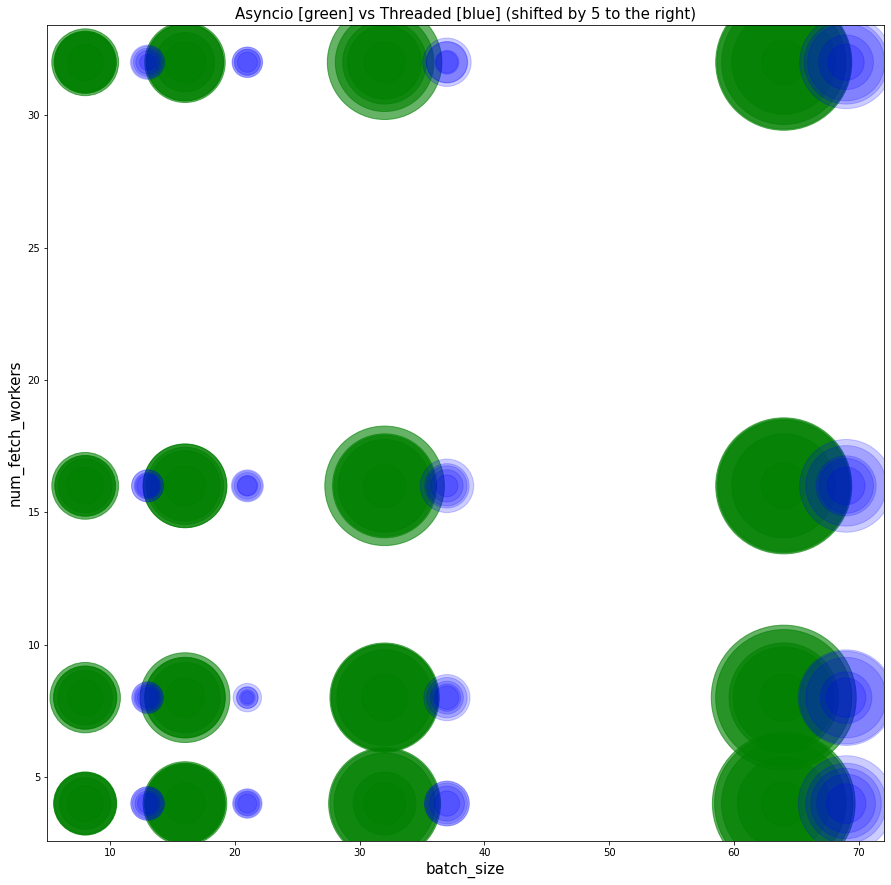

In [38]:
plt.rcParams["figure.figsize"] = (15,15)
ax = plt.gca()
ax.scatter(scratch_rate_matrix_asyncio.batch_size, 
           scratch_rate_matrix_asyncio.num_fetch_workers,
           s=scratch_rate_matrix_asyncio.rate**1.2,
             alpha=0.6, 
             c="green",
             marker='o')
ax.scatter(scratch_rate_matrix_threaded.batch_size+5, 
           scratch_rate_matrix_threaded.num_fetch_workers, 
           s=scratch_rate_matrix_threaded.rate**1.2,
             alpha=0.2, 
             c="blue",
             marker='o')
plt.xlabel("batch_size", size=15)
plt.ylabel("num_fetch_workers", size=15)
plt.title("Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)", size=15)

Text(0.5, 1.0, 'Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)')

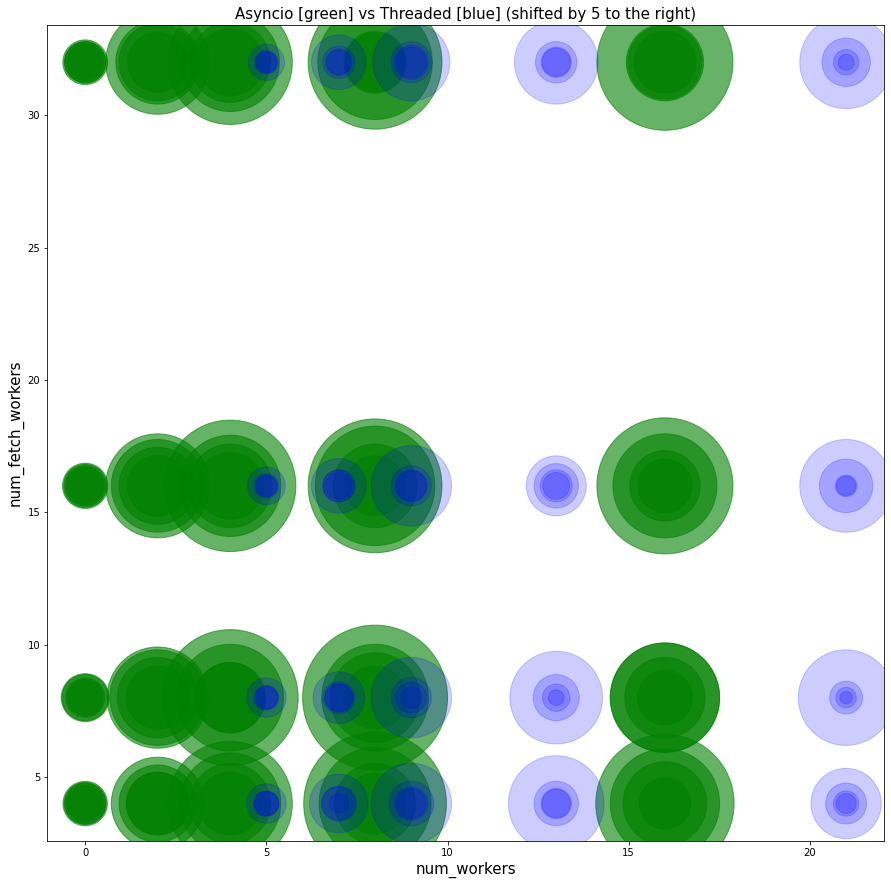

In [39]:
plt.rcParams["figure.figsize"] = (15,15)
ax = plt.gca()
ax.scatter(scratch_rate_matrix_asyncio.num_workers, 
           scratch_rate_matrix_asyncio.num_fetch_workers,
           s=scratch_rate_matrix_asyncio.rate**1.2,
             alpha=0.6, 
             c="green",
             marker='o')
ax.scatter(scratch_rate_matrix_threaded.num_workers+5, 
           scratch_rate_matrix_threaded.num_fetch_workers, 
           s=scratch_rate_matrix_threaded.rate**1.2,
             alpha=0.2, 
             c="blue",
             marker='o')
plt.xlabel("num_workers", size=15)
plt.ylabel("num_fetch_workers", size=15)
plt.title("Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)", size=15)

Text(0.5, 1.0, 'Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)')

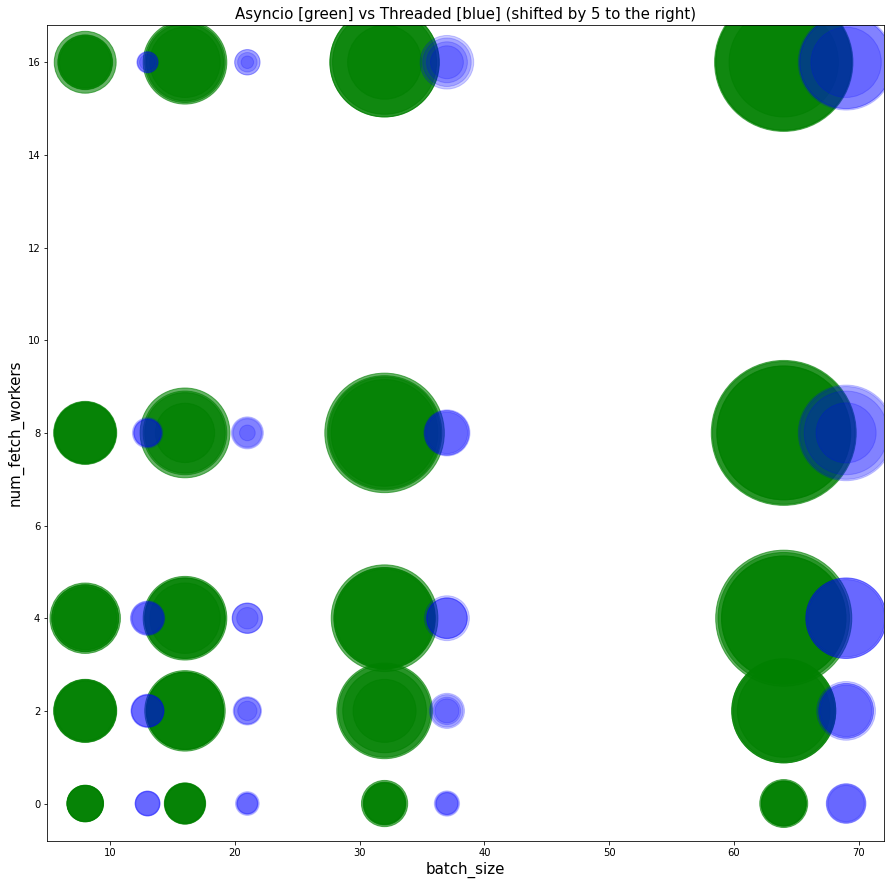

In [40]:
plt.rcParams["figure.figsize"] = (15,15)
ax = plt.gca()
ax.scatter(scratch_rate_matrix_asyncio.batch_size, 
           scratch_rate_matrix_asyncio.num_workers,
           s=scratch_rate_matrix_asyncio.rate**1.2,
             alpha=0.6, 
             c="green",
             marker='o')
ax.scatter(scratch_rate_matrix_threaded.batch_size+5, 
           scratch_rate_matrix_threaded.num_workers, 
           s=scratch_rate_matrix_threaded.rate**1.2,
             alpha=0.2, 
             c="blue",
             marker='o')
plt.xlabel("batch_size", size=15)
plt.ylabel("num_fetch_workers", size=15)
plt.title("Asyncio [green] vs Threaded [blue] (shifted by 5 to the right)", size=15)

In [41]:
scratch_both = pd.concat([scratch_rate_matrix_asyncio, 
                     scratch_rate_matrix_threaded["rate"]], 
                     ignore_index = True, axis = 1)
scratch_both['diff'] = scratch_both.apply(lambda row: float(row[4] - row[3]) , axis = 1)
scratch_both.columns = ['batch_size', 'num_fetch_workers', 'num_workers', 'a_rate', 't_rate', 'diff']
# both["diff"] = both["diff"].clip(lower=0)
# # both

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(scratch_both.sort_values(["diff"], ascending=False))
    

    batch_size  num_fetch_workers  num_workers  a_rate  t_rate    diff
60        64.0                4.0          0.0   557.3   459.9   -97.4
70        64.0               16.0          0.0   575.6   425.3  -150.3
75        64.0               32.0          0.0   564.4   396.0  -168.4
65        64.0                8.0          0.0   633.2   458.7  -174.5
0          8.0                4.0          0.0   393.2   213.7  -179.5
5          8.0                8.0          0.0   391.8   210.9  -180.9
10         8.0               16.0          0.0   405.6   208.3  -197.3
15         8.0               32.0          0.0   398.1   193.9  -204.2
20        16.0                4.0          0.0   480.4   196.3  -284.1
25        16.0                8.0          0.0   454.1   168.1  -286.0
40        32.0                4.0          0.0   505.5   217.8  -287.7
30        16.0               16.0          0.0   471.7   157.5  -314.2
55        32.0               32.0          0.0   489.6   169.9  -319.7
35    

In [42]:
num_workers_unique = np.unique(scratch_both["num_workers"].to_numpy())
batch_size_unique = np.unique(scratch_both["batch_size"].to_numpy())
num_fetch_workers_unique = np.unique(scratch_both["num_fetch_workers"].to_numpy())
print(batch_size_unique)

[ 8. 16. 32. 64.]


In [43]:
import plotly
import plotly.graph_objects as go

#Make Plot.ly Layout
plotly_layout = go.Layout(scene=dict(xaxis=dict(title="batch_size"),
                                     yaxis=dict(title="num_fetch_workers"),
                                     zaxis=dict(title="num_workers")),)

scratch_threaded_rate_sizes = scratch_both['t_rate']/50

scratch_threaded_fig = go.Scatter3d(x=scratch_both['batch_size'],
                            y=scratch_both['num_fetch_workers'],
                            z=scratch_both['num_workers'],
                            marker=dict(size=scratch_threaded_rate_sizes,
                                        color="blue",
                                        opacity=0.4,
                                        reversescale=True),
                            line=dict (width=0.02),
                            mode='markers',
                            name="threaded")

fig = go.Figure(data=[scratch_threaded_fig], layout=plotly_layout)
fig.show()

In [44]:
scratch_async_rate_sizes = s3_both['a_rate']/10

scratch_async_fig = go.Scatter3d(x=scratch_both['batch_size'],
                            y=scratch_both['num_fetch_workers'],
                            z=scratch_both['num_workers'],
                            marker=dict(size=scratch_async_rate_sizes,
                                        color="green",
                                        opacity=0.4,
                                        reversescale=True),
                            line=dict (width=0.02),
                            mode='markers',
                            name="async")

fig = go.Figure(data=[scratch_async_fig], layout=plotly_layout)
fig.show()

In [45]:
scratch_async_rate_sizes = s3_both['a_rate']/10
scratch_threaded_rate_sizes = s3_both['t_rate']/10

#Make Plotly figure
scratch_async_fig = go.Scatter3d(x=scratch_both['batch_size'],
                         y=scratch_both['num_fetch_workers'],
                         z=scratch_both['num_workers'],
                         marker=dict(size=scratch_async_rate_sizes,
                                     color="green",
                                     opacity=0.9,
                                     reversescale=True),
                         line=dict (width=0.02),
                         mode='markers',
                         name="asyncio")

scratch_threaded_fig = go.Scatter3d(x=scratch_both['batch_size'],
                            y=scratch_both['num_fetch_workers'],
                            z=scratch_both['num_workers'],
                            marker=dict(size=scratch_threaded_rate_sizes,
                                        color="blue",
                                        opacity=0.4,
                                        reversescale=True),
                            line=dict (width=0.02),
                            mode='markers',
                            name="threaded")


fig = go.Figure(data=[scratch_async_fig, scratch_threaded_fig], layout=plotly_layout)
fig.show()

S3 vs Scratch

In [46]:
scratch_both

batch_size  num_fetch_workers  num_workers  a_rate  t_rate    diff
0          8.0                4.0          0.0   393.2   213.7  -179.5
1          8.0                4.0          2.0   985.7   348.7  -637.0
2          8.0                4.0          4.0  1000.0   348.1  -651.9
3          8.0                4.0          8.0   949.0   295.0  -654.0
4          8.0                4.0         16.0   713.5   148.1  -565.4
..         ...                ...          ...     ...     ...     ...
75        64.0               32.0          0.0   564.4   396.0  -168.4
76        64.0               32.0          2.0  2300.0   787.2 -1512.8
77        64.0               32.0          4.0  3100.0  1400.0 -1700.0
78        64.0               32.0          8.0  3500.0  1600.0 -1900.0
79        64.0               32.0         16.0  3600.0  1900.0 -1700.0

[80 rows x 6 columns]

In [47]:
s3_both

batch_size  num_fetch_workers  num_workers  a_rate  t_rate  diff
0          8.0                4.0          0.0    10.2    11.4   1.2
1          8.0                4.0          2.0    62.7    75.9  13.2
2          8.0                4.0          4.0    87.0   107.0  20.0
3          8.0                4.0          8.0   105.7   116.5  10.8
4          8.0                4.0         16.0    76.6    91.6  15.0
..         ...                ...          ...     ...     ...   ...
75        64.0               32.0          0.0    65.2   125.6  60.4
76        64.0               32.0          2.0   207.4   198.0  -9.4
77        64.0               32.0          4.0   220.9   215.7  -5.2
78        64.0               32.0          8.0   175.9   174.6  -1.3
79        64.0               32.0         16.0   118.6    48.9 -69.7

[80 rows x 6 columns]

In [48]:
s3_scratch = pd.concat([s3_both, 
                        scratch_both[["a_rate", "t_rate", "diff"]]], 
                        ignore_index = True, axis = 1)
s3_scratch.columns = ['batch_size', 
                      'num_fetch_workers', 
                      'num_workers', 
                      's3_a_rate', 
                      's3_t_rate', 
                      's3_diff', 
                      'sc_a_rate', 
                      'sc_t_rate',
                      'sc_diff',]
s3_scratch.sort_values(["s3_diff"], ascending=False)

batch_size  num_fetch_workers  num_workers  s3_a_rate  s3_t_rate  s3_diff  \
47        32.0                8.0          4.0      136.6      215.0     78.4   
50        32.0               16.0          0.0       54.8      127.8     73.0   
70        64.0               16.0          0.0       65.6      131.3     65.7   
55        32.0               32.0          0.0       45.3      107.1     61.8   
75        64.0               32.0          0.0       65.2      125.6     60.4   
..         ...                ...          ...        ...        ...      ...   
13         8.0               16.0          8.0       78.1       37.4    -40.7   
36        16.0               32.0          2.0      123.2       78.9    -44.3   
79        64.0               32.0         16.0      118.6       48.9    -69.7   
69        64.0                8.0         16.0      321.7      217.7   -104.0   
74        64.0               16.0         16.0      228.6      112.0   -116.6   

    sc_a_rate  sc_t_rate  sc_diff  
47     2400.0      475.2  -1924.8  
50      526.2      172.6   -353.6  
70      575.6      425.3   -150.3  
55      489.6      169.9   -319.7  
75      564.4      396.0   -168.4  
..        ...        ...      ...  
13      925.4      240.3   -685.1  
36     1400.0      235.0  -1165.0  
79     3600.0     1900.0  -1700.0  
69     2500.0     2000.0   -500.0  
74     3600.0     1900.0  -1700.0  

[80 rows x 9 columns]

In [49]:
s3_scratch.sort_values(["sc_diff"], ascending=True)

batch_size  num_fetch_workers  num_workers  s3_a_rate  s3_t_rate  s3_diff  \
73        64.0               16.0          8.0      305.7      295.2    -10.5   
64        64.0                4.0         16.0      370.1      395.3     25.2   
53        32.0               16.0          8.0      163.9      169.3      5.4   
58        32.0               32.0          8.0       92.5       92.4     -0.1   
49        32.0                8.0         16.0      203.1      201.2     -1.9   
..         ...                ...          ...        ...        ...      ...   
0          8.0                4.0          0.0       10.2       11.4      1.2   
65        64.0                8.0          0.0       42.7       93.2     50.5   
75        64.0               32.0          0.0       65.2      125.6     60.4   
70        64.0               16.0          0.0       65.6      131.3     65.7   
60        64.0                4.0          0.0       23.4       52.8     29.4   

    sc_a_rate  sc_t_rate  sc_diff  
73     3500.0      920.9  -2579.1  
64     3700.0     1200.0  -2500.0  
53     2900.0      557.4  -2342.6  
58     2700.0      496.6  -2203.4  
49     2500.0      337.7  -2162.3  
..        ...        ...      ...  
0       393.2      213.7   -179.5  
65      633.2      458.7   -174.5  
75      564.4      396.0   -168.4  
70      575.6      425.3   -150.3  
60      557.3      459.9    -97.4  

[80 rows x 9 columns]

In [50]:
alls3_async_rate_sizes = s3_scratch['s3_a_rate']/60
allsc_async_rate_sizes = s3_scratch['sc_a_rate']/60
alls3_threaded_rate_sizes = s3_scratch['s3_t_rate']/60
allsc_threaded_rate_sizes = s3_scratch['sc_t_rate']/60

#Make Plotly figure
alls3_async_fig = go.Scatter3d(x=s3_scratch['batch_size'],
                         y=s3_scratch['num_fetch_workers'],
                         z=s3_scratch['num_workers'],
                         marker=dict(size=alls3_async_rate_sizes,
                                     color="green",
                                     opacity=0.9,
                                     symbol="square",
                                     reversescale=True),
                         line=dict (width=0.02),
                         mode='markers',
                         name="asyncio-s3")

allsc_async_fig = go.Scatter3d(x=s3_scratch['batch_size'],
                            y=s3_scratch['num_fetch_workers'],
                            z=s3_scratch['num_workers'],
                            marker=dict(size=allsc_async_rate_sizes,
                                        color="blue",
                                        opacity=0.4,
                                        symbol="square",
                                        reversescale=True),
                            line=dict (width=0.02),
                            mode='markers',
                            name="asyncio-scratch")

alls3_threaded_fig = go.Scatter3d(x=s3_scratch['batch_size'],
                         y=s3_scratch['num_fetch_workers'],
                         z=s3_scratch['num_workers'],
                         marker=dict(size=alls3_threaded_rate_sizes,
                                     color="red",
                                     opacity=0.9,
                                     reversescale=True),
                         line=dict (width=0.02),
                         mode='markers',
                         name="threaded-s3")

allsc_threaded_fig = go.Scatter3d(x=s3_scratch['batch_size'],
                            y=s3_scratch['num_fetch_workers'],
                            z=s3_scratch['num_workers'],
                            marker=dict(size=allsc_threaded_rate_sizes,
                                        color="orange",
                                        opacity=0.4,
                                        reversescale=True),
                            line=dict (width=0.02),
                            mode='markers',
                            name="threaded-scratch")



fig = go.Figure(data=[alls3_async_fig, allsc_async_fig, alls3_threaded_fig, allsc_threaded_fig], layout=plotly_layout)
fig.show()